In [1]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import missingno as msno

In [2]:
ls crime_data_raw/2017

apr17.xls*  dec17.xls*  jan17.xls*  jun17.xls*  may17.xls*  oct17.xls*
aug17.xls*  feb17.xls*  jul17.xls*  mar17.xls*  nov17.xls*  sep17.xls*


In [3]:
path = 'crime_data_raw/2017'

In [4]:
#ls crime_data_raw/

In [5]:
# # get premise codes

# pc = pd.read_csv('crime_data_raw/premise_codes.csv')
# pc.head()

In [6]:
# # rename premise column for easy merge
# pc.rename(columns={'Premise Type': 'Premise',}, inplace=True)
# pc.info()

In [7]:
# combine all files into one df
all_files = glob.glob(os.path.join(path, "*.xls")) 


df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

WARNING *** file size (3078551) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [8]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
# offenses      40378 non-null float64
Beat            119727 non-null object
Block Range     79349 non-null object
BlockRange      40378 non-null object
Date            119727 non-null object
Hour            119727 non-null int64
Offense Type    119727 non-null object
Offenses        79349 non-null float64
Premise         119240 non-null object
Street Name     79349 non-null object
StreetName      40378 non-null object
Suffix          119727 non-null object
Type            119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


In [10]:
df[df.Date.isnull()]

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type


## Inspect Premise col

In [11]:
len(df.Premise.value_counts(dropna=False))

253

In [12]:
df.Premise.value_counts(dropna=False).head()

Residence or House           13967
Apartment Parking Lot        12838
Road, Street, or Sidewalk    11297
Apartment                    10249
Other Parking Lot             4864
Name: Premise, dtype: int64

In [13]:
len(df.Premise.unique())

253

In [14]:
df.Premise = df.Premise.str.strip()

In [15]:
len(df.Premise.value_counts(dropna=False))

133

In [16]:
df.Premise.value_counts(dropna=False).head()

Residence or House           15197
Apartment Parking Lot        14009
Road, Street, or Sidewalk    12409
Apartment                    11302
Other Parking Lot             5419
Name: Premise, dtype: int64

In [17]:
# check if  null values
df.isnull().values.any().any()

True

In [18]:
# check su, of null values
df.isnull().values.sum()

359668

In [19]:
len(df[df.isnull().any(axis=1)])

119727

## Visualize our data

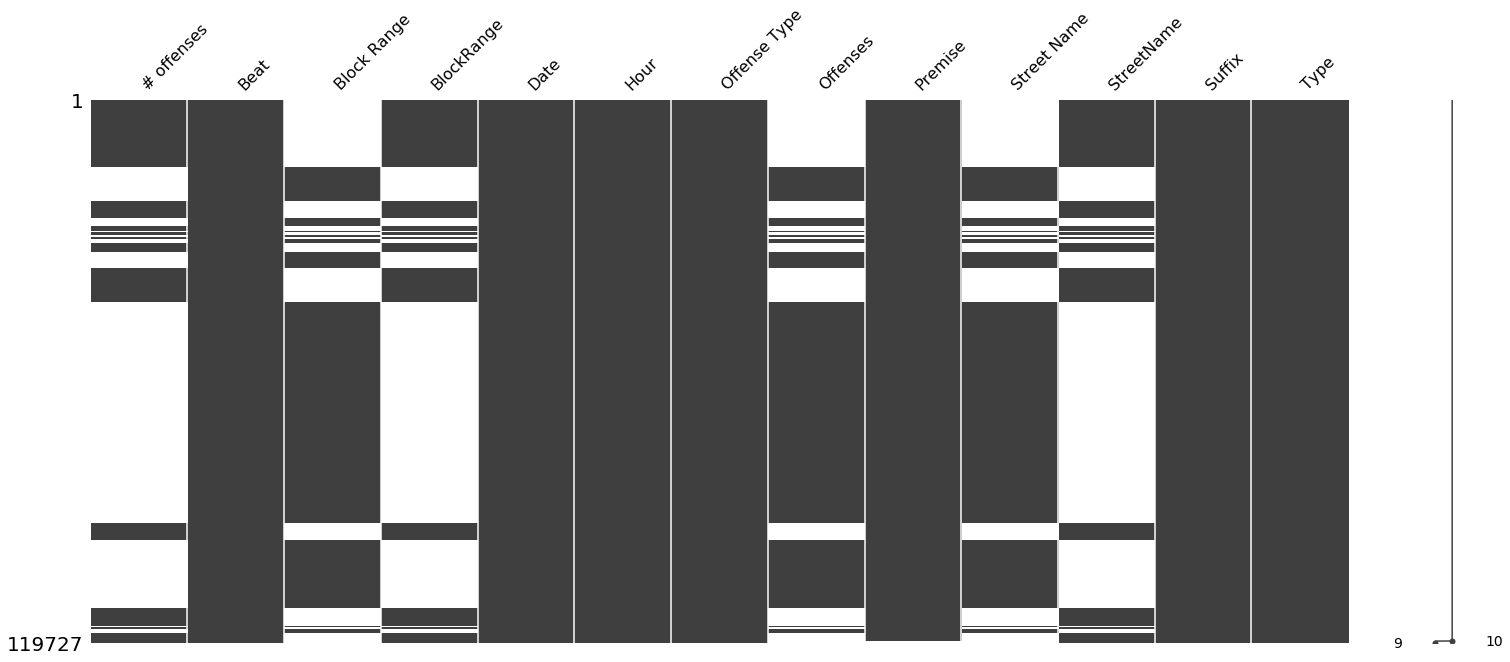

In [20]:
#data = df.replace("nan", np.nan)


sorted_data = msno.nullity_sort(df, sort='descending')
msno.matrix(sorted_data)

## col cleaning

- joining similar columns
- renaming

In [21]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [22]:

# if duplicate columns

df['BlockRange'] = pd.concat([df['Block Range'].dropna(),
                              df['BlockRange'].dropna()]).reindex_like(df)

df['StreetName'] = pd.concat([df['Street Name'].dropna(),
                              df['StreetName'].dropna()]).reindex_like(df)

df['# offenses'] = pd.concat([df['# offenses'].dropna(),
                              df['Offenses'].dropna()]).reindex_like(df)

In [23]:
df.head()

,# offenses,Beat,Block Range,BlockRange,Date,Hour,Offense Type,Offenses,Premise,Street Name,StreetName,Suffix,Type
0,1.0,10H10,NaN,200-299,2017-04-10 00:00:00,15,Burglary,NaN,Residence or House,NaN,CLIFTON,-,-
1,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,15,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
2,1.0,10H10,NaN,2300-2399,2017-04-11 00:00:00,17,Theft,NaN,Restaurant or Cafeteria Parking Lot,NaN,CANAL,-,ST
3,1.0,10H10,NaN,4600-4699,2017-04-12 00:00:00,9,Burglary,NaN,Miscellaneous Business (Non-Specific),NaN,CANAL,-,ST
4,1.0,10H10,NaN,100-199,2017-04-12 00:00:00,19,Theft,NaN,"Other, Unknown, or Not Listed",NaN,ADAM,-,LN


In [24]:
# df.rename(columns={
#     '# Of Offenses': 'NumOffenses',
#      'Offense Type': 'OffenseType',
# }, inplace=True)
# df.info()

In [25]:
df.rename(columns={
    '# offenses': 'NumOffenses',
     'Offense Type': 'OffenseType',
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
NumOffenses    119727 non-null float64
Beat           119727 non-null object
Block Range    79349 non-null object
BlockRange     119727 non-null object
Date           119727 non-null object
Hour           119727 non-null int64
OffenseType    119727 non-null object
Offenses       79349 non-null float64
Premise        119240 non-null object
Street Name    79349 non-null object
StreetName     119727 non-null object
Suffix         119727 non-null object
Type           119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


## Subset dataframe to work on 

In [26]:
crimes = df[['Date','Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour']]
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 8 columns):
Date           119727 non-null object
Beat           119727 non-null object
BlockRange     119727 non-null object
StreetName     119727 non-null object
OffenseType    119727 non-null object
Premise        119240 non-null object
NumOffenses    119727 non-null float64
Hour           119727 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


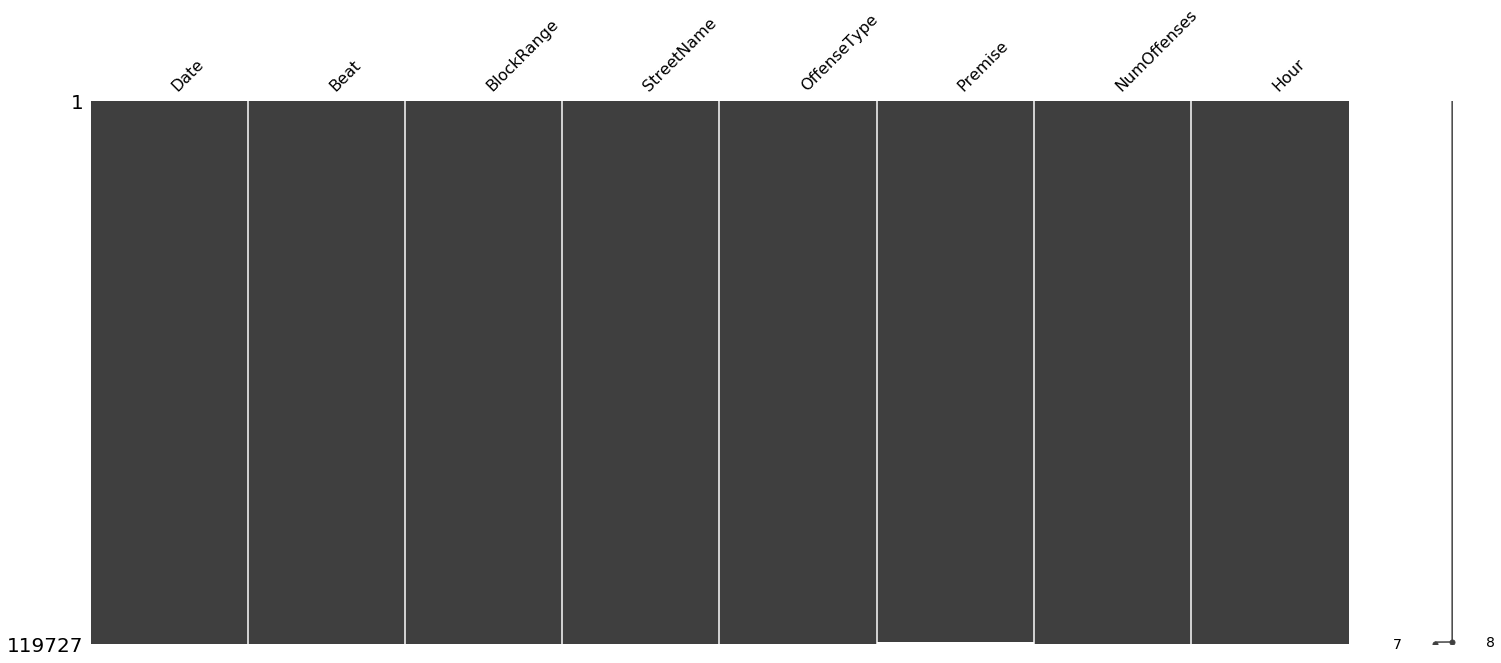

In [27]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

# FIND NAN onevery col

In [28]:
len(crimes[crimes.Date.isnull()])

0

In [29]:
crimes[crimes.Date.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [30]:
len(crimes[crimes.Beat.isnull()])

0

In [31]:
crimes[crimes.Beat.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [32]:
len(crimes[crimes.BlockRange.isnull()])

0

In [33]:
crimes[crimes.BlockRange.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [34]:
len(crimes[crimes.StreetName.isnull()])

0

In [35]:
crimes[crimes.StreetName.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [36]:
len(crimes[crimes.OffenseType.isnull()])

0

In [37]:
crimes[crimes.OffenseType.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [38]:
len(crimes[crimes.Premise.isnull()])

487

In [39]:
crimes[crimes.Premise.isnull()].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
30,2017-04-29 00:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0,21
132,2017-04-16 00:00:00,10H40,2700-2799,TRAVIS,Burglary,NaN,1.0,7
185,2017-04-06 00:00:00,10H40,1500-1599,HADLEY,Theft,NaN,1.0,22
259,2017-04-18 00:00:00,10H50,3900-3999,DENNIS,Theft,NaN,1.0,1
391,2017-04-04 00:00:00,10H60,2800-2899,SOUTHMORE,Aggravated Assault,NaN,1.0,22


In [40]:
len(crimes[crimes.NumOffenses.isnull()])

0

In [41]:
crimes[crimes.NumOffenses.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


In [42]:
len(crimes[crimes.Hour.isnull()])

0

In [43]:
crimes[crimes.Hour.isnull()]

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour


## Find NaN
- drop if > 2 nan

In [44]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 8 columns):
Date           119727 non-null object
Beat           119727 non-null object
BlockRange     119727 non-null object
StreetName     119727 non-null object
OffenseType    119727 non-null object
Premise        119240 non-null object
NumOffenses    119727 non-null float64
Hour           119727 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.3+ MB


In [45]:
len(crimes[crimes.isnull().any(axis=1)])

487

In [46]:
crimes[crimes.isnull().any(axis=1)].head()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
30,2017-04-29 00:00:00,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0,21
132,2017-04-16 00:00:00,10H40,2700-2799,TRAVIS,Burglary,NaN,1.0,7
185,2017-04-06 00:00:00,10H40,1500-1599,HADLEY,Theft,NaN,1.0,22
259,2017-04-18 00:00:00,10H50,3900-3999,DENNIS,Theft,NaN,1.0,1
391,2017-04-04 00:00:00,10H60,2800-2899,SOUTHMORE,Aggravated Assault,NaN,1.0,22


## Problem
- find nan values on one col, and copy related col

In [47]:
#crimes.Premise.unique()

In [48]:
#len(crimes[crimes['Premise'] == '---'])

In [49]:
#len(crimes[crimes['Premise'] == 'N'])

In [50]:
#crimes[crimes['Premise'] == 'N']

In [51]:
#crimes.loc[crimes['Premise Description'].isnull(),'Premise Description'] = crimes['Premise']

In [52]:
#len(crimes[crimes['Premise Description'].isnull()])

In [53]:

#crimes[crimes['Premise Description'].isnull()]

## Visualize data

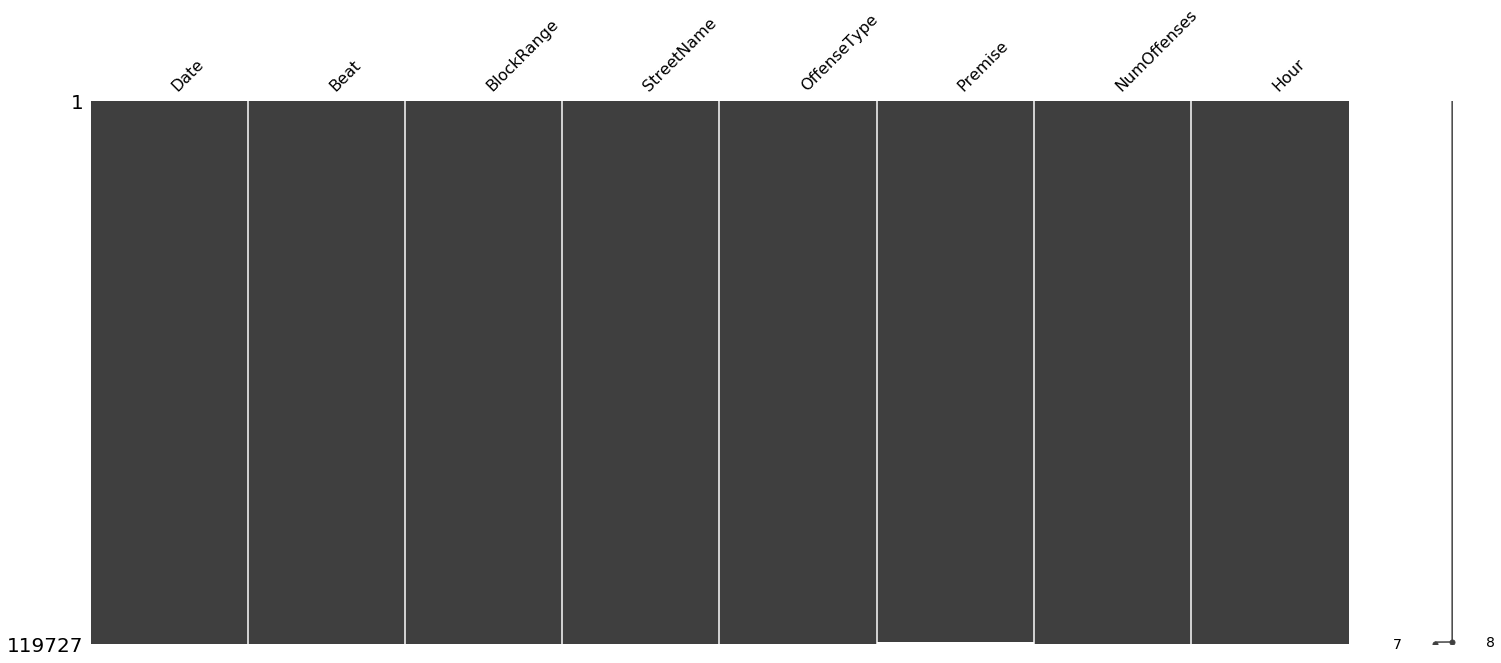

In [54]:
sorted_data = msno.nullity_sort(crimes, sort='descending')
msno.matrix(sorted_data)

## Display any null values

In [55]:
len(crimes[crimes.isnull().any(axis=1)])

487

In [56]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
80864,2017-03-07 00:00:00,9C20,6400-6499,MARKET,Robbery,NaN,1.0,21
80893,2017-03-15 00:00:00,9C30,10300-10399,EAST,Theft,NaN,1.0,0
80932,2017-03-23 00:00:00,9C30,400-499,MERCURY,Burglary,NaN,1.0,10
80997,2017-03-08 00:00:00,9C40,12000-12099,EAST,Theft,NaN,1.0,20
81131,2017-03-30 00:00:00,UNK,10200-10299,EAST,Theft,NaN,1.0,22


## drop rows with 2 or 3 or more NaN

In [57]:
crimes = crimes.dropna(thresh=3)

In [58]:
len(crimes[crimes.isnull().any(axis=1)])

487

In [59]:
crimes[crimes.isnull().any(axis=1)].tail()

,Date,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
80864,2017-03-07 00:00:00,9C20,6400-6499,MARKET,Robbery,NaN,1.0,21
80893,2017-03-15 00:00:00,9C30,10300-10399,EAST,Theft,NaN,1.0,0
80932,2017-03-23 00:00:00,9C30,400-499,MERCURY,Burglary,NaN,1.0,10
80997,2017-03-08 00:00:00,9C40,12000-12099,EAST,Theft,NaN,1.0,20
81131,2017-03-30 00:00:00,UNK,10200-10299,EAST,Theft,NaN,1.0,22


## Inspect each column

In [60]:
crimes.dtypes

Date            object
Beat            object
BlockRange      object
StreetName      object
OffenseType     object
Premise         object
NumOffenses    float64
Hour             int64
dtype: object

## Beat

In [61]:
len(crimes.Beat.value_counts())

237

In [62]:
len(crimes.Beat.value_counts(dropna=False))

237

In [63]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [64]:
# replace extra ' with empty space
crimes['Beat'] = crimes.Beat.str.replace("'", " ")

In [65]:
len(crimes.Beat.value_counts(dropna=False))

237

In [66]:
# strip empty spaces
crimes.Beat = crimes.Beat.str.strip()

In [67]:
len(crimes.Beat.value_counts(dropna=False))  # get the total

120

In [68]:
crimes.Beat.unique()

array(['10H10', '10H20', '10H30', '10H40', '10H50', '10H60', '10H70',
       '10H80', '11H10', '11H20', '11H30', '11H40', '11H50', '12D10',
       '12D20', '12D30', '12D40', '12D50', '12D60', '12D70', '13D10',
       '13D20', '13D30', '13D40', '14D10', '14D20', '14D30', '14D40',
       '14D50', '15E10', '15E20', '15E30', '15E40', '16E10', '16E20',
       '16E30', '16E40', '17E10', '17E20', '17E30', '17E40', '18F10',
       '18F20', '18F30', '18F40', '18F50', '18F60', '19G10', '19G20',
       '19G30', '19G40', '19G50', '1A10', '1A20', '1A30', '1A40', '1A50',
       '20G10', '20G20', '20G30', '20G40', '20G50', '20G60', '20G70',
       '20G80', '21I10', '21I20', '21I30', '21I40', '21I50', '21I60',
       '21I70', '23J50', '24C10', '24C20', '24C30', '24C40', '24C50',
       '24C60', '2A10', '2A20', '2A30', '2A40', '2A50', '2A60', '3B10',
       '3B30', '3B40', '3B50', '4F10', '4F20', '4F30', '5F10', '5F20',
       '5F30', '5F40', '6B10', '6B20', '6B30', '6B40', '6B50', '6B60',
       '7C10

In [69]:
crimes.Beat.value_counts(dropna=False).head()

1A20     2852
15E40    2443
12D10    2430
19G10    2205
18F20    2202
Name: Beat, dtype: int64

## BlockRange

In [70]:
len(crimes.BlockRange.value_counts(dropna=False))

320

In [71]:
crimes.BlockRange.value_counts(dropna=False).head()

900-999      1652
UNK          1629
100-199      1605
2400-2499    1553
2300-2399    1472
Name: BlockRange, dtype: int64

In [72]:
# strip
crimes.BlockRange =crimes.BlockRange.str.strip()

In [73]:
len(crimes.BlockRange.value_counts(dropna=False))

320

## StreetName

In [74]:
print('before:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

before:21587


In [75]:
crimes.StreetName = crimes.StreetName.str.strip()

In [76]:
print('after:{}'.format(len(crimes.StreetName.value_counts(dropna=False))))

after:18672


In [77]:
print(crimes.StreetName.value_counts(dropna=False).head())

WESTHEIMER       2101
WESTHEIMER RD    1438
GESSNER          1028
NORTH             882
LOOP              833
Name: StreetName, dtype: int64


## OffenseType

In [78]:
print('before:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

before:16


In [79]:
crimes.OffenseType = crimes.OffenseType.str.strip()

In [80]:
print('after:{}'.format(len(crimes.OffenseType.value_counts(dropna=False))))

after:9


In [81]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67422
Burglary              17084
Aggravated Assault    12314
Robbery                9778
AutoTheft              7627
Auto Theft             3874
Rape                   1368
Murder                  258
NaN                       2
Name: OffenseType, dtype: int64


In [82]:
# join Auto Theft & AutoTheft
crimes.OffenseType = crimes.OffenseType.replace('AutoTheft','Auto Theft')

In [83]:
print(crimes.OffenseType.value_counts(dropna=False))

Theft                 67422
Burglary              17084
Aggravated Assault    12314
Auto Theft            11501
Robbery                9778
Rape                   1368
Murder                  258
NaN                       2
Name: OffenseType, dtype: int64


## Premise

In [84]:
print('before:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

before:133


In [85]:
crimes.Premise = crimes.Premise.str.strip()

In [86]:
print('after:{}'.format(len(crimes.Premise.value_counts(dropna=False))))

after:133


In [87]:
crimes.Premise.value_counts(dropna=False).head()

Residence or House           15197
Apartment Parking Lot        14009
Road, Street, or Sidewalk    12409
Apartment                    11302
Other Parking Lot             5419
Name: Premise, dtype: int64

# Set Date as index

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119727 entries, 0 to 119726
Data columns (total 13 columns):
NumOffenses    119727 non-null float64
Beat           119727 non-null object
Block Range    79349 non-null object
BlockRange     119727 non-null object
Date           119727 non-null object
Hour           119727 non-null int64
OffenseType    119727 non-null object
Offenses       79349 non-null float64
Premise        119240 non-null object
Street Name    79349 non-null object
StreetName     119727 non-null object
Suffix         119727 non-null object
Type           119727 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 11.9+ MB


In [89]:
# date
crimes.Date = pd.to_datetime(crimes.Date)

crimes = crimes.set_index('Date').sort_index(ascending=True)

In [90]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour
Date,,,,,,,
1917-01-20,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,12
1917-02-20,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,15
1917-02-20,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,16
1917-04-16,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,12
1917-12-18,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,14


## Create Columns with day,weekday,month,year from date index

In [91]:
# get day, weekday,month ,year

crimes['day'] = crimes.index.strftime('%d')
crimes['weekday'] = crimes.index.strftime('%A')
crimes['month'] = crimes.index.strftime('%b')
crimes['year'] = crimes.index.strftime('%Y')

In [92]:
crimes.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1917-01-20,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,12,20,Saturday,Jan,1917
1917-02-20,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,15,20,Tuesday,Feb,1917
1917-02-20,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,16,20,Tuesday,Feb,1917
1917-04-16,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,12,16,Monday,Apr,1917
1917-12-18,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,14,18,Tuesday,Dec,1917


In [93]:
crimes.day.unique()

array(['20', '16', '18', '29', '26', '06', '31', '03', '01', '24', '15',
       '13', '21', '04', '09', '25', '30', '07', '08', '11', '23', '10',
       '28', '02', '27', '19', '17', '14', '22', '12', '05'], dtype=object)

In [94]:
len(crimes.day.unique())

31

In [95]:
crimes.day.value_counts(dropna=False)

13    4153
01    4092
05    4089
06    4072
20    4049
17    4037
18    3997
26    3990
22    3975
07    3975
04    3950
14    3943
15    3934
21    3924
10    3923
11    3922
24    3916
19    3902
16    3866
03    3864
27    3864
02    3859
08    3857
12    3835
23    3809
28    3806
09    3786
25    3743
30    3723
29    3472
31    2400
Name: day, dtype: int64

In [96]:
crimes.weekday.unique()

array(['Saturday', 'Tuesday', 'Monday', 'Sunday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [97]:
crimes.weekday.value_counts(dropna=False)

Monday       18202
Friday       17919
Thursday     17736
Tuesday      17338
Wednesday    17329
Saturday     16317
Sunday       14886
Name: weekday, dtype: int64

In [98]:
crimes.month.value_counts(dropna=False)

Jan    10546
May    10530
Dec    10491
Jul    10470
Jun    10367
Aug    10085
Mar     9837
Oct     9817
Nov     9749
Feb     9716
Apr     9504
Sep     8615
Name: month, dtype: int64

In [99]:
crimes.year.value_counts(dropna=False)

2017    118581
2016      1002
2015        51
2014        31
2013        10
2010         8
2007         7
1917         5
2011         5
2012         3
2009         3
1983         2
2005         2
1993         2
2008         2
2002         2
2006         2
1920         2
1990         1
2000         1
1976         1
1953         1
1927         1
2001         1
1964         1
Name: year, dtype: int64

## null values

- check
- count
- display

In [100]:
crimes.isnull().values.any().any()

True

In [101]:
# display any null

len(crimes[crimes.isnull().any(axis=1)])

498

In [102]:
crimes[crimes.isnull().any(axis=1)].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2007-12-30,3B30,2000-2099,43RD,Theft,NaN,1.0,16,30,Sunday,Dec,2007
2014-01-08,6B60,800-899,GREENS,Rape,NaN,1.0,12,08,Wednesday,Jan,2014
2016-10-07,4F30,2100-2199,HIGHWAY 6,Aggravated Assault,NaN,1.0,22,07,Friday,Oct,2016
2016-10-09,19G10,9700-9799,BISSONNET,Rape,NaN,1.0,8,09,Sunday,Oct,2016
2016-10-15,17E30,9000-9099,BELLFORT,Theft,NaN,1.0,17,15,Saturday,Oct,2016


In [103]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119727 entries, 1917-01-20 to 2017-12-31
Data columns (total 11 columns):
Beat           119727 non-null object
BlockRange     119727 non-null object
StreetName     119718 non-null object
OffenseType    119725 non-null object
Premise        119240 non-null object
NumOffenses    119727 non-null float64
Hour           119727 non-null int64
day            119727 non-null object
weekday        119727 non-null object
month          119727 non-null object
year           119727 non-null object
dtypes: float64(1), int64(1), object(9)
memory usage: 13.5+ MB


## New Dataframe
- remove premise col
- keep premise description

In [104]:
crime_yr = crimes[['Beat','BlockRange','StreetName','OffenseType','Premise','NumOffenses','Hour','day','weekday','month','year']]
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1917-01-20,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,12,20,Saturday,Jan,1917
1917-02-20,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,15,20,Tuesday,Feb,1917
1917-02-20,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,16,20,Tuesday,Feb,1917
1917-04-16,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,12,16,Monday,Apr,1917
1917-12-18,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,14,18,Tuesday,Dec,1917


In [105]:
crime_yr.isnull().values.any().any()

True

In [106]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

498

In [107]:
crime_yr[crime_yr.isnull().any(axis=1)].tail()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2017-04-28,14D40,12300-12399,MARTIN LUTHER KING,Aggravated Assault,NaN,1.0,18,28,Friday,Apr,2017
2017-04-28,7C20,2100-2199,KIRK,Robbery,NaN,1.0,22,28,Friday,Apr,2017
2017-04-29,5F40,7700-7799,WILLOW CHASE,Theft,NaN,1.0,18,29,Saturday,Apr,2017
2017-04-29,2A30,200-299,20TH,Robbery,NaN,1.0,12,29,Saturday,Apr,2017
2017-04-29,10H10,4700-4799,HARRISBURG,Burglary,NaN,1.0,21,29,Saturday,Apr,2017


# FIND NANS

## INDEX

In [108]:
len(crime_yr[crime_yr.index.isnull()])

0

In [109]:
crime_yr[crime_yr.index.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [110]:
# drop index nans
crime_yr.index.dropna(how='any')

DatetimeIndex(['1917-01-20', '1917-02-20', '1917-02-20', '1917-04-16',
               '1917-12-18', '1920-02-29', '1920-04-26', '1927-04-06',
               '1953-07-20', '1964-10-31',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=119727, freq=None)

In [111]:
len(crime_yr[crime_yr.index.isnull()])

0

## Beat

In [112]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [113]:
crime_yr[crime_yr.Beat.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [114]:
crime_yr.Beat = crime_yr.Beat.replace(np.nan, 'UNK')

In [115]:
len(crime_yr[crime_yr.Beat.isnull()])

0

In [116]:
crime_yr[crime_yr.Beat.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## BlockRAnge

In [117]:
len(crime_yr[crime_yr.BlockRange.isnull()])

0

In [118]:
crime_yr[crime_yr.BlockRange.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## StreetName

In [119]:
len(crime_yr[crime_yr.StreetName.isnull()])

9

In [120]:
crime_yr[crime_yr.StreetName.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2016-12-22,2A30,UNK,NaN,Theft,Alley,1.0,13,22,Thursday,Dec,2016
2017-01-16,2A30,UNK,NaN,Theft,Residence or House,1.0,15,16,Monday,Jan,2017
2017-01-20,2A30,UNK,NaN,Theft,"Road, Street, or Sidewalk",1.0,22,20,Friday,Jan,2017
2017-01-26,2A30,UNK,NaN,Burglary,Residence or House,1.0,13,26,Thursday,Jan,2017
2017-02-03,18F60,UNK,NaN,Theft,Hotel or Motel Parking Lot,1.0,8,03,Friday,Feb,2017


In [121]:
crime_yr.StreetName = crime_yr.StreetName.replace(np.nan, 'UNK')

In [122]:
len(crime_yr[crime_yr.StreetName.isnull()])

0

## OffenseType

In [123]:
len(crime_yr[crime_yr.OffenseType.isnull()])

2

In [124]:
crime_yr[crime_yr.OffenseType.isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2016-12-31,6B20,4200-4299,OAK SHADOWS,NaN,Residence or House,1.0,1,31,Saturday,Dec,2016
2017-02-15,20G40,1400-1499,DAIRY ASHFORD,NaN,Apartment,1.0,23,15,Wednesday,Feb,2017


In [125]:
crime_yr.OffenseType = crime_yr.OffenseType.replace(np.nan, 'UNK')

In [126]:
len(crime_yr[crime_yr.OffenseType.isnull()])

0

## Hour

In [127]:
len(crime_yr[crime_yr.Hour.isnull()])

0

In [128]:
crime_yr[crime_yr.Hour.isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Premsie 

In [129]:
len(crime_yr[crime_yr['Premise'].isnull()])

487

In [130]:
crime_yr[crime_yr['Premise'].isnull()].head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
2007-12-30,3B30,2000-2099,43RD,Theft,NaN,1.0,16,30,Sunday,Dec,2007
2014-01-08,6B60,800-899,GREENS,Rape,NaN,1.0,12,08,Wednesday,Jan,2014
2016-10-07,4F30,2100-2199,HIGHWAY 6,Aggravated Assault,NaN,1.0,22,07,Friday,Oct,2016
2016-10-09,19G10,9700-9799,BISSONNET,Rape,NaN,1.0,8,09,Sunday,Oct,2016
2016-10-15,17E30,9000-9099,BELLFORT,Theft,NaN,1.0,17,15,Saturday,Oct,2016


In [131]:
crime_yr['Premise'] = crime_yr['Premise'].replace(np.nan, 'No label')

In [132]:
len(crime_yr[crime_yr['Premise'].isnull()])

0

In [133]:
crime_yr[crime_yr['Premise'].isnull()]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


In [134]:
# display any null

len(crime_yr[crime_yr.isnull().any(axis=1)])

0

In [135]:
crime_yr[crime_yr.isnull().any(axis=1)]

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,


## Save

In [136]:
# # change column name from Premise Descriptionto Premise

# crime_yr.rename(columns={
#     'Premise Description': 'Premise',}, inplace=True)
# crime_yr.info()

In [137]:
crime_yr.head()

,Beat,BlockRange,StreetName,OffenseType,Premise,NumOffenses,Hour,day,weekday,month,year
Date,,,,,,,,,,,
1917-01-20,20G20,2100-2199,GESSNER,Theft,Apartment Parking Lot,1.0,12,20,Saturday,Jan,1917
1917-02-20,17E20,9100-9199,FONDREN,Auto Theft,"Road, Street, or Sidewalk",1.0,15,20,Tuesday,Feb,1917
1917-02-20,10H70,7500-7599,ARDMORE,Theft,Other Parking Lot,1.0,16,20,Tuesday,Feb,1917
1917-04-16,18F20,1100-1199,UPTOWN PARK,Rape,Bar or Night Club,1.0,12,16,Monday,Apr,1917
1917-12-18,9C20,500-599,PORTWALL,Theft,Miscellaneous Business (Non-Specific),1.0,14,18,Tuesday,Dec,1917


In [138]:
ls crime_data_clean/new

Final_crime10_clean.csv*  Final_crime13_clean.csv*  Final_crime15_clean.csv*
Final_crime12_clean.csv*  Final_crime14_clean.csv*  Final_crime16_clean.csv*


In [139]:
crime_yr.to_csv('crime_data_clean/new/Final_crime17_clean.csv')

In [140]:
ls crime_data_clean/new

Final_crime10_clean.csv*  Final_crime14_clean.csv*  Final_crime17_clean.csv*
Final_crime12_clean.csv*  Final_crime15_clean.csv*
Final_crime13_clean.csv*  Final_crime16_clean.csv*
